# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
previsao_raw = pd.read_csv('previsao_de_renda.csv')

In [3]:
previsao_raw.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [5]:
# vamos trabalhar com as variáveis idade x renda e tempo_emprego x renda
previsao_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

### Análise da Relação Idade x Renda

In [6]:
previsao_1 = previsao_raw[['idade', 'renda']]
previsao_1.head()

,idade,renda
0,36,3369.24
1,42,6096.14
2,31,5658.98
3,50,7246.69
4,52,4017.37


In [8]:
cor_1 = previsao_1.groupby('idade').agg('mean')
cor_1.head()

,renda
idade,
22,3267.420000
23,3133.977667
24,3553.384937
25,4537.637619
26,3995.085990


In [9]:
cor_1.reset_index(level=0, inplace=True)

,idade,renda
idade,1.000000,0.276831
renda,0.276831,1.000000


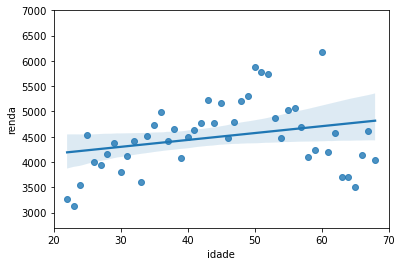

In [10]:
_ = sns.regplot(x='idade', y='renda', data = cor_1)
plt.xlim(20, 70)
plt.ylim(2700, 7000)
cor_1.corr()

### Análise da Relação Tempo_emprego x Renda

In [11]:
previsao_2 = previsao_raw[['tempo_emprego', 'renda']].copy()
previsao_2.head()

,tempo_emprego,renda
0,3.575342,3369.24
1,0.860274,6096.14
2,8.065753,5658.98
3,1.208219,7246.69
4,13.873973,4017.37


In [12]:
previsao_2.count()

tempo_emprego    12466
renda            15000
dtype: int64

In [13]:
previsao_2.dropna()

,tempo_emprego,renda
0,3.575342,3369.24
1,0.860274,6096.14
2,8.065753,5658.98
3,1.208219,7246.69
4,13.873973,4017.37
...,...,...
14995,2.046575,1193.29
14996,12.079452,2519.18
14997,2.161644,1586.85
14998,3.295890,6975.39


In [16]:
# análise dos valores máximo e mínimo para o tempo de entrego, afim de criar os intervalos

tempo_max = previsao_2['tempo_emprego'].max()
tempo_min = previsao_2['tempo_emprego'].min()
quartil = (tempo_max - tempo_min)/20
print(tempo_max, tempo_min, quartil)

42.90684931506849 0.1917808219178082 2.1357534246575343


In [17]:
split_tempo = pd.cut(previsao_2['tempo_emprego'], [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24,
                                                  26, 28, 30, 32, 34, 36, 38, 40, 42, 44])

cor_2 = previsao_2.groupby(split_tempo).agg('mean')
cor_2

,tempo_emprego,renda
tempo_emprego,,
"(0, 2]",1.058116,3483.745764
"(2, 4]",3.017310,3730.004223
"(4, 6]",4.933212,4020.157193
"(6, 8]",6.918638,4529.727957
"(8, 10]",8.901574,4575.445714
"(10, 12]",10.858247,5582.118181
"(12, 14]",12.934265,5544.287232
"(14, 16]",14.982019,5962.036047
"(16, 18]",16.953057,6753.066944


,tempo_emprego,renda
tempo_emprego,1.000000,0.581523
renda,0.581523,1.000000


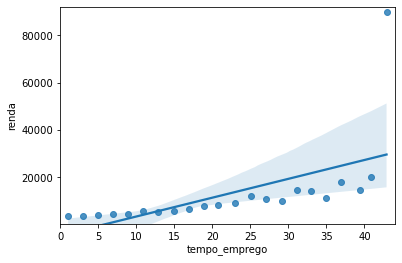

In [18]:
_ = sns.regplot(x='tempo_emprego', y='renda', data = cor_2)
plt.xlim(0, 44)
plt.ylim(100, 92000)
cor_2.corr()

In [19]:
cor_2.loc[cor_2.tempo_emprego >= 42] = np.nan

,tempo_emprego,renda
tempo_emprego,1.000000,0.943236
renda,0.943236,1.000000


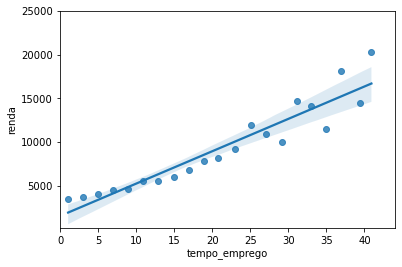

In [20]:
_ = sns.regplot(x='tempo_emprego', y='renda', data = cor_2)
plt.xlim(0, 44)
plt.ylim(100, 25000)
cor_2.corr()

### <span style="color:blue"> Análise item 1</span>
<span style="color:gray"> Dentre as duas variáveis quantitativas escolhidas, a variável 'tempo_emprego' mostra relação de influência na renda mais significativa do que a variável 'idade'.</span>

<span style="color:gray"> A faixa acima de 42 anos de tempo_emprego apresenta um outlier que reduz bastante o índice de correlação (antes 0.58, depois 0.94), mas que ao mesmo tempo explica o efeito entre o maior tempo de experiência com a maior faixa de renda.</span>


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [22]:
previsao_3 = previsao_raw[['idade','tempo_emprego']].copy()
previsao_3.head()

,idade,tempo_emprego
0,36,3.575342
1,42,0.860274
2,31,8.065753
3,50,1.208219
4,52,13.873973


In [23]:
cor_3 = previsao_3.groupby('idade').agg('mean')
cor_3.head()

,tempo_emprego
idade,
22,2.635959
23,3.038356
24,3.113716
25,3.372577
26,3.346682


In [25]:
cor_3.reset_index(level=0, inplace=True)

,idade,tempo_emprego
idade,1.000000,0.868198
tempo_emprego,0.868198,1.000000


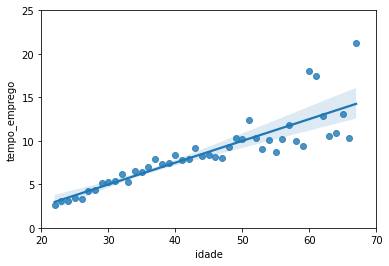

In [28]:
_ = sns.regplot(x='idade', y='tempo_emprego', data = cor_3)
plt.xlim(20, 70)
plt.ylim(0, 25)
cor_3.corr()

### <span style="color:blue"> Análise item 2</span>
<span style="color:gray"> As duas variáveis quantitativas que mostram relação com a variável 'tempo_emprego' são as variáveis: idade e tempo de emprego. Naturalmente seria fácil deduzir que quanto mais jovem é a pessoa menos tempo de trabalho terá. Essa dedução aparece no gráfico de dispersão mostrando uma correção alta entre essas duas variáveis de 0.86.</span>

3) Na su aopinião, há outliers na variável renda?

**Sim, existe. Foi citado análise do item 1.**
No entanto, vamos aplicar o método rank para ver como se comportam os dados na mesma base.

In [32]:
previsao_4 = previsao_raw[['tempo_emprego', 'renda']].copy()


In [33]:
previsao_4.dropna()

,tempo_emprego,renda
0,3.575342,3369.24
1,0.860274,6096.14
2,8.065753,5658.98
3,1.208219,7246.69
4,13.873973,4017.37
...,...,...
14995,2.046575,1193.29
14996,12.079452,2519.18
14997,2.161644,1586.85
14998,3.295890,6975.39


In [36]:
cor_4 = previsao_2.groupby(split_tempo).agg('mean')

In [37]:
cor_4_rank = pd.concat([cor_4, cor_4.rank()], axis = 1)

cor_4_rank.columns = ['x', 'y', 'x_rank', 'y_rank']
cor_4_rank

,x,y,x_rank,y_rank
tempo_emprego,,,,
"(0, 2]",1.058116,3483.745764,1.0,1.0
"(2, 4]",3.017310,3730.004223,2.0,2.0
"(4, 6]",4.933212,4020.157193,3.0,3.0
"(6, 8]",6.918638,4529.727957,4.0,4.0
"(8, 10]",8.901574,4575.445714,5.0,5.0
"(10, 12]",10.858247,5582.118181,6.0,7.0
"(12, 14]",12.934265,5544.287232,7.0,6.0
"(14, 16]",14.982019,5962.036047,8.0,8.0
"(16, 18]",16.953057,6753.066944,9.0,9.0


,x,y,x_rank,y_rank
x,1.000000,0.581523,0.999960,0.978351
y,0.581523,1.000000,0.583555,0.589651
x_rank,0.999960,0.583555,1.000000,0.978543
y_rank,0.978351,0.589651,0.978543,1.000000


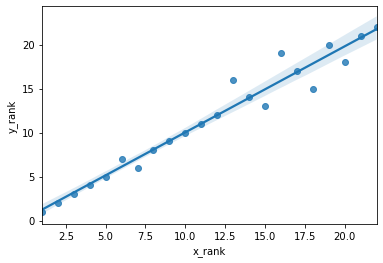

In [38]:
_ = sns.regplot(x='x_rank', y='y_rank', data = cor_4_rank)
cor_4_rank.corr()

### <span style="color:blue"> Análise item 3</span>
<span style="color:gray"> Aplicando o método rank na base de correlação tempo_emprego x renda, o valor de covariância não é alterado, permanece o mesmo 0.58. No entanto, a representação gráfica mostra os dados mais alinhados.</span>

4) Calcule o logaritmo da variável renda e repita a sequência de análise

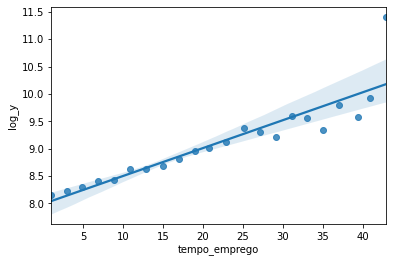

In [42]:
cor_4_log = cor_4.copy()
cor_4_log['log_y'] = np.log(cor_4_log['renda'])

_ = sns.regplot(x='tempo_emprego', y='log_y', data = cor_4_log)

In [43]:
cor_4_log.corr()

,tempo_emprego,renda,log_y
tempo_emprego,1.000000,0.581523,0.905012
renda,0.581523,1.000000,0.859193
log_y,0.905012,0.859193,1.000000


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

**A aplicação do LOG não alterou o comportamento dos dados. O índice de covariância permaneceu o mesmo.**